# Flappy Bird Agents Demo

This notebook demonstrates the usage and performance of the Random and Heuristic agents in the Flappy Bird environment. We will run each agent for several episodes and compare their scores.

In [6]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../../'))

In [7]:
# Import Flappy Environment and Agents
from src.flappy.env.pygame_flappy_env import PygameFlappyEnv
from src.flappy.agents.random_agent import RandomAgent
from src.flappy.agents.heuristic_agent import HeuristicAgent

## Demonstrate Random Agent Usage

Let's run the RandomAgent for several episodes and record the scores.

In [8]:
# Run Random Agent
random_scores = []
num_episodes = 20
for episode in range(num_episodes):
    env = PygameFlappyEnv()
    agent = RandomAgent(env.action_space)
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = agent.select_action(obs)
        obs, reward, done, truncated, info = env.step(action)
        agent.learn(obs, reward, done, info)
        total_reward += reward
    random_scores.append(info.get('score', 0))
print(f"RandomAgent scores over {num_episodes} episodes:", random_scores)

RandomAgent scores over 20 episodes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Demonstrate Heuristic Agent Usage

Now let's run the HeuristicAgent for the same number of episodes and record the scores.

In [9]:
# Run Heuristic Agent
heuristic_scores = []
for episode in range(num_episodes):
    env = PygameFlappyEnv()
    agent = HeuristicAgent(env.action_space)
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = agent.select_action(obs)
        obs, reward, done, truncated, info = env.step(action)
        agent.learn(obs, reward, done, info)
        total_reward += reward
    heuristic_scores.append(info.get('score', 0))
print(f"HeuristicAgent scores over {num_episodes} episodes:", heuristic_scores)

HeuristicAgent scores over 20 episodes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Visualize Agent Performance

Let's plot the scores of both agents to compare their performance.

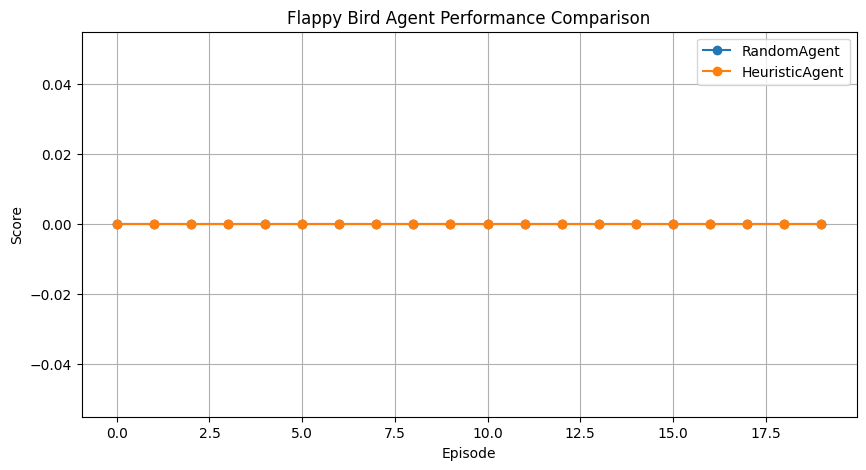

In [10]:
# Plot the scores
plt.figure(figsize=(10,5))
plt.plot(random_scores, label='RandomAgent', marker='o')
plt.plot(heuristic_scores, label='HeuristicAgent', marker='o')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Flappy Bird Agent Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()